In [221]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [222]:
#Define df as our Dataset and set date as our index for the Dataset
df = pd.read_csv("data_clean_with_dummies.csv")
df = df.set_index('date')

#Define X and y, with X holding the Features and y the correspoding Count of pedestrians
#Features with PCA k=0.999 (PC1 - PC48)
X = df[df.columns[55:103]]

# The targetvariable we try to predict is the pedestrian count
y = df["pedestrians count"]

In [223]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets as numpy arryas (for our Neural Network)
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.3, random_state=72)


from sklearn.preprocessing import StandardScaler
#Normalize the Data
# Scale the inputs to standardize the values of the Features
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)


In [224]:
#Import Keras and layers to create a Neural Network with multiple layers
from tensorflow import keras
from tensorflow.keras import layers

In [235]:
#Define Neural Network model

#Create a Keras Sequential class to hold the different layers of our Neural Network
model = keras.Sequential()

model.add(keras.Input(shape=X.shape[1])) #Add a Input layer and define the Input shape of it (which is the column lenght of the feature Dataset X)
model.add(layers.Dense(100, activation="relu")) #Add a Hidden layer with 500 Neurones with Dense. Dense takes the output from our Input layer applies a weight matrix and than applies a activation function (in this case relu).
model.add(layers.Dense(50, activation="relu")) #Add a second Hidden layer with 250 Neurones with Dense. Dense takes the output from our first hidden layer applies a weight matrix and than applies a activation function (in this case relu).
model.add(layers.Dense(50, activation="relu")) #Add a third Hidden layer with 100 Neurones with Dense. 
model.add(layers.Dense(50, activation="relu")) #Add a third Hidden layer with 100 Neurones with Dense. 
model.add(layers.Dense(25, activation="relu")) #Add a fourth Hidden layer with 50 Neurones with Dense. 
model.add(layers.Dense(25, activation="relu")) #Add a fourth Hidden layer with 50 Neurones with Dense. 
model.add(layers.Dense(10, activation="relu")) #Add a fourth Hidden layer with 50 Neurones with Dense. 
model.add(layers.Dense(1, activation="relu")) # Add a output layer with 1 Neuron because we only have one output --> predicted pedestrian count

model.summary()#Display an overview of the Model


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 100)               4900      
                                                                 
 dense_63 (Dense)            (None, 50)                5050      
                                                                 
 dense_64 (Dense)            (None, 50)                2550      
                                                                 
 dense_65 (Dense)            (None, 50)                2550      
                                                                 
 dense_66 (Dense)            (None, 25)                1275      
                                                                 
 dense_67 (Dense)            (None, 25)                650       
                                                                 
 dense_68 (Dense)            (None, 10)               

In [236]:
#Specify the training configuration for the Neural Network
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Optimizer that minimizes our loss function (f.e SGD or Adam) with a learning rate of 0.001
    loss=keras.losses.mae,  # Loss function to minimize --> Mean absolute error 
    metrics=["mae", "mse"], # List of metrics to monitor
)

#Mehrere callbacks einfügen mit learning rate von keras callbacks --> webseite

history = model.fit(
    Xtrain, # Fit the model on the train data 
    ytrain, #Fit the model on the train data 
    #batch_size=64,
    epochs=100, # 1 epoch is one training iteration - for each epoch the Neural Network processes the entire training data 
    callbacks = tf.keras.callbacks.EarlyStopping(monitor="val_mae", patience=10), #Stop training when training is no longer improving Mean absolute error of the validation data (20% of the training data) within 3 epochs (metrics)
    validation_split=0.2, #Reserve 20% of the training data for validation at the end of each epoch 
)

Epoch 1/100


2022-11-23 17:45:25.261477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - ETA: 0s - loss: 1843.4800 - mae: 1843.4800 - mse: 9774812.0000

2022-11-23 17:45:29.058369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - 5s 15ms/step - loss: 1843.4800 - mae: 1843.4800 - mse: 9774812.0000 - val_loss: 769.1206 - val_mae: 769.1206 - val_mse: 1774918.8750
Epoch 2/100
269/269 [==============================] - 3s 11ms/step - loss: 684.9207 - mae: 684.9207 - mse: 1636593.7500 - val_loss: 567.7155 - val_mae: 567.7155 - val_mse: 1198481.5000
Epoch 3/100
269/269 [==============================] - 3s 11ms/step - loss: 526.7800 - mae: 526.7800 - mse: 1137145.6250 - val_loss: 476.1995 - val_mae: 476.1995 - val_mse: 953696.3125
Epoch 4/100
269/269 [==============================] - 3s 10ms/step - loss: 451.9587 - mae: 451.9587 - mse: 942494.1250 - val_loss: 465.7811 - val_mae: 465.7811 - val_mse: 942535.6250
Epoch 5/100
269/269 [==============================] - 3s 12ms/step - loss: 419.4051 - mae: 419.4051 - mse: 869369.6875 - val_loss: 411.9517 - val_mae: 411.9517 - val_mse: 826883.8750
Epoch 6/100
269/269 [==============================] - 3s 11ms/step - loss: 395.9695 

In [237]:
from sklearn.metrics import r2_score
#import tensorflow_addons as tfa


pred_train = model.predict(Xtrain)
ypred = model.predict(Xtest)
print(f"R score is : {r2_score(ytest, ypred)}")


# mae = tf.keras.losses.MeanAbsoluteError()
# mae(ytest, ypred).numpy()
# print(f"MAE is : {tf.keras.losses.MeanAbsoluteError(ytest, ypred).numpy()}"

 10/336 [..............................] - ETA: 1s 

2022-11-23 17:47:28.018198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


144/144 [==============================] - 0s 3ms/step
R score is : 0.9526087528234198


In [238]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

print(f"MSE: {np.sqrt(mean_squared_error(ytest, ypred))}")

print(f"MAE: {np.sqrt(mean_absolute_error(ytest,ypred))}")

MSE: 709.9516121066504
MAE: 17.91549499668933


In [239]:
# Evaluate the model on the test data using `evaluate` result is the corresponding MAE
print("Evaluate on test data")
results = model.evaluate(Xtest, ytest)
results_train = model.evaluate(Xtrain, ytrain)
print("test loss, test acc:", results)
print("train loss, train acc:", results_train)
results


######NUR ZUM ÜBERPRÜFUEN!!!!!!!!!!
# test loss, test acc: [343.4073791503906, 343.4073791503906]
# train loss, train acc: [321.52264404296875, 321.52264404296875]


Evaluate on test data
336/336 [==============================] - 2s 6ms/step - loss: 292.3102 - mae: 292.3102 - mse: 573096.9375
test loss, test acc: [320.9649658203125, 320.9649658203125, 504031.34375]
train loss, train acc: [292.3101501464844, 292.3101501464844, 573096.9375]


[320.9649658203125, 320.9649658203125, 504031.34375]

144/144 [==============================] - 1s 3ms/step


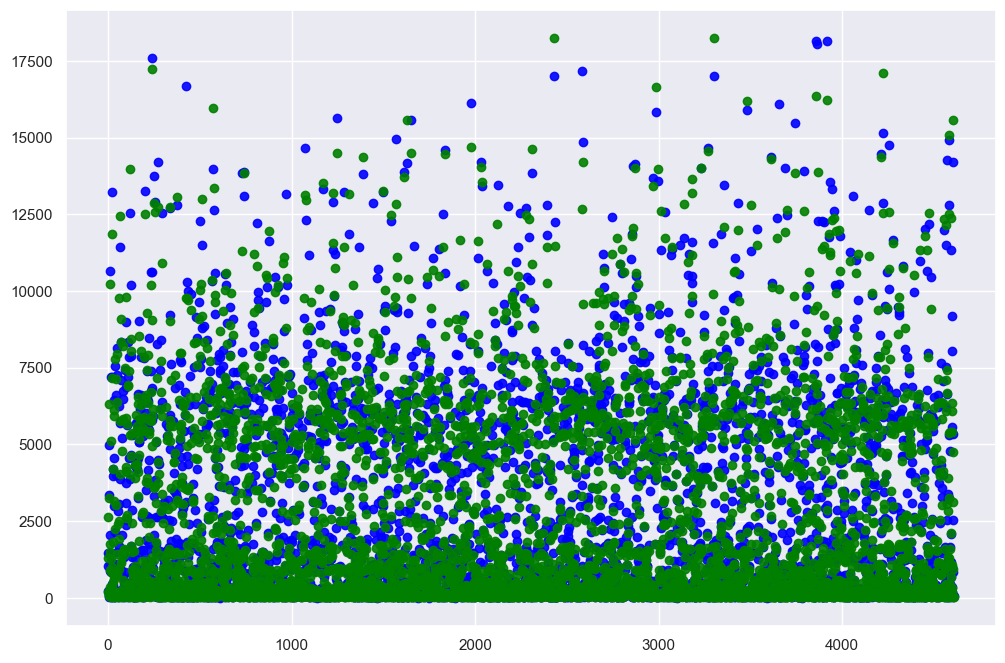

In [240]:
#Visualize the results predictions vs actual values
#Create a sequenze from 0 to the row lenght of the test data in order to plot
xs = np.linspace(0, ytest.shape[0], num=ytest.shape[0])

fig, ax = plt.subplots(figsize=(12, 8))

#Using the Neural Network to predict the Pedestrian count for our Xtest set in order to plot it against the actual values
ypred = model.predict(Xtest)

plt.scatter(xs, ytest, color ='blue', alpha=0.9)

plt.scatter(xs, ypred, color ='green', alpha=0.9)

plt.show()

144/144 [==============================] - 1s 6ms/step - loss: 320.9650 - mae: 320.9650 - mse: 504031.3438


<BarContainer object of 1 artists>

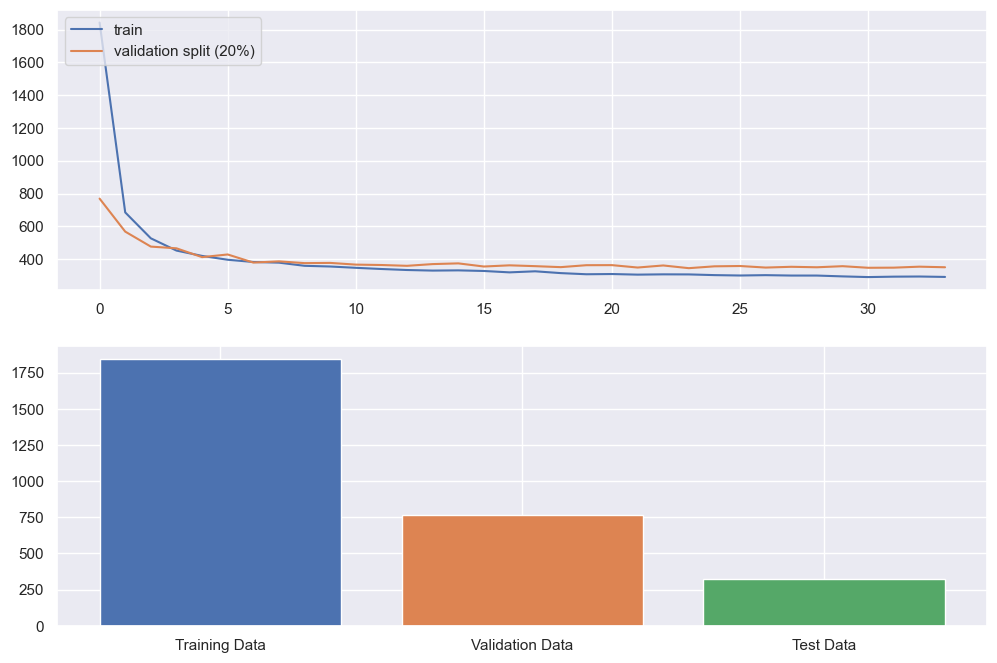

In [241]:
#Plot the MAE on the training data against the validation split of the Training data over time 
#history.history.keys()

fig, axs = plt.subplots(2, figsize=(12, 8))

axs[0].plot(history.history['mae'])
axs[0].plot(history.history['val_mae'])
#axs[0].title('model MAE')
# axs[0].ylabel('MAE')
# axs[0].xlabel('epoch')
axs[0].legend(['train', 'validation split (20%)'], loc='upper left')


# axs[1].plot(history.history['loss'])
# axs[1].plot(history.history['val_loss'])
# # axs[1].title('Model loss')
# # axs[1].ylabel('loss')
# #axs[1].xlabel('epoch')
# axs[1].legend(['train', 'test'], loc='upper left')


f_mae = history.history["mae"]
f_val_mae = history.history["val_mae"]
f_test_mae = model.evaluate(Xtest, ytest)

axs[1].bar("Training Data",f_mae[0])
axs[1].bar("Validation Data", f_val_mae[0])
axs[1].bar("Test Data", f_test_mae[0])
# axs[2].title('MAE comparission')
# axs[2].ylabel('MAE')





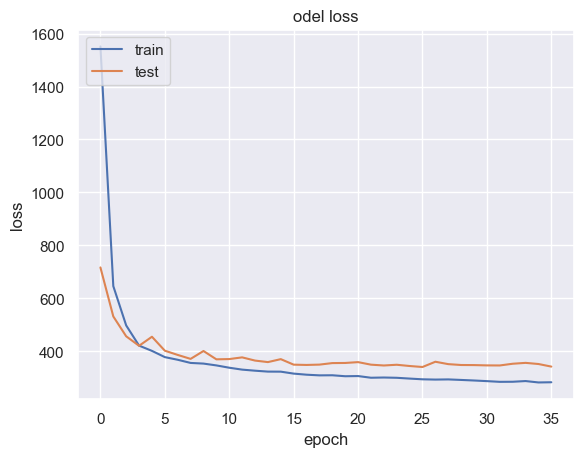

In [234]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('odel loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

144/144 [==============================] - 1s 5ms/step - loss: 320.9650 - mae: 320.9650 - mse: 504031.3438


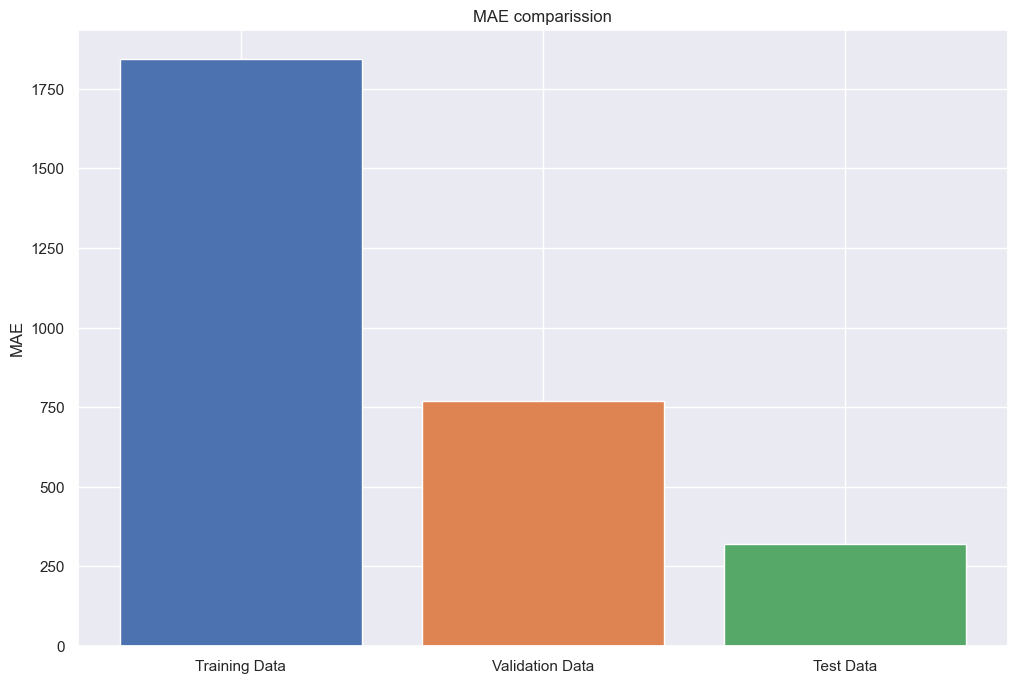

In [244]:
#Compare the MAE of the training data and the validation split with the MAE on the test data
# summarize history for loss
f_mae = history.history["mae"]
f_val_mae = history.history["val_mae"]
f_test_mae = model.evaluate(Xtest, ytest)

fig, ax = plt.subplots(figsize=(12, 8))
plt.bar("Training Data",f_mae[0])
plt.bar("Validation Data", f_val_mae[0])
plt.bar("Test Data", f_test_mae[0])
plt.title('MAE comparission')
plt.ylabel('MAE')
plt.show()

### Hyperparameter tuning

In [255]:
# def evaluate_model(model, Xtest, ytest):
#     """
#     evaluate model on test set and show results in dataframe.
    
#     Parameters
#     ----------
#     model : keras model
#         trained keras model.
#     X_test : numpy array
#         Features of holdout set.
#     y_test : numpy array
#         Labels of holdout set.
        
#     Returns
#     -------
#     display_df : DataFrame
#         Pandas dataframe containing evaluation results.
#     """
#     eval_dict = model.evaluate(Xtest, ytest, return_dict=True)
    
#     display_df = pd.DataFrame([eval_dict.values()], columns=[list(eval_dict.keys())])
    
#     return display_df

# # Evaluate model on test set and add results to dataframe
# results = evaluate_model(model, Xtest, ytest)

# # Set index to 'Baseline'
# results.index = ['Startwerte']

# # Display results
# results.head()

144/144 [==============================] - 1s 8ms/step - loss: 320.9650 - mae: 320.9650 - mse: 504031.3438


,loss,mae,mse
Startwerte,320.964966,320.964966,504031.34375


In [258]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    model.add(
layers.Dense(
            # Define the hyperparameter.
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            activation="relu",
        )
    )
    model.add(layers.Dense(10, activation="relu"))
    model.compile(
        optimizer="adam", loss="mae", metrics=["accuracy"],
    )
    return model



    odel = keras.Sequential()

model.add(keras.Input(shape=X.shape[1])) #Add a Input layer and define the Input shape of it (which is the column lenght of the feature Dataset X)
model.add(layers.Dense(100, activation="relu")) #Add a Hidden layer with 500 Neurones with Dense. Dense takes the output from our Input layer applies a weight matrix and than applies a activation function (in this case relu).
model.add(layers.Dense(50, activation="relu")) #Add a second Hidden layer with 250 Neurones with Dense. Dense takes the output from our first hidden layer applies a weight matrix and than applies a activation function (in this case relu).
model.add(layers.Dense(50, activation="relu")) #Add a third Hidden layer with 100 Neurones with Dense. 
model.add(layers.Dense(50, activation="relu")) #Add a third Hidden layer with 100 Neurones with Dense. 
model.add(layers.Dense(25, activation="relu")) #Add a fourth Hidden layer with 50 Neurones with Dense. 
model.add(layers.Dense(25, activation="relu")) #Add a fourth Hidden layer with 50 Neurones with Dense. 
model.add(layers.Dense(10, activation="relu")) #Add a fourth Hidden layer with 50 Neurones with Dense. 
model.add(layers.Dense(1, activation="relu")) # Add a

In [259]:
import keras_tuner

build_model(keras_tuner.HyperParameters())


In [266]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    model.add(
        layers.Dense(
            # Tune number of units.
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            # Tune the activation function to use.
            activation=hp.Choice("activation", ["relu", "tanh"]),
        )
    )

    # Define the optimizer learning rate as a hyperparameter.
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="mae",
        metrics=["accuracy"],
    )
    return model


build_model(keras_tuner.HyperParameters())

In [290]:
# tuner = keras_tuner.Hyperband(
#     hypermodel=build_model,
#     objective="val_accuracy",
#     max_trials=3,
#     executions_per_trial=2,
#     overwrite=True,
#     directory="my_dir",
#     project_name="helloworld",
# )
# tuner.search_space_summary()


uner = keras_tuner.Hyperband(build_model,
                     objective="val_accuracy",
                     max_epochs=20,
                     factor=10,
                     hyperband_iterations=10,
                     directory="kt_dir",
                     project_name="kt_hyperband",)

tuner.search_space_summary()

Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [278]:
tuner.search(Xtrain, ytrain, epochs=10, validation_split=0.2)


Search: Running Trial #51

Value             |Best Value So Far |Hyperparameter
512               |64                |units
tanh              |tanh              |activation
0.00099438        |0.00079402        |lr
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
4                 |4                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2


2022-11-23 19:49:59.672248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  8/269 [..............................] - ETA: 15s - loss: 2904.2983 - accuracy: 0.0000e+00

KeyboardInterrupt: 

### Hyperparameter Tuning

In [356]:
# import keras_tuner as kt

# def model_builder(hp):
#   model = tf.keras.Sequential()
#   model.add(tf.keras.layers.Flatten())
#   # model.add(tf.keras.layers.Flatten(input_shape=(1, 48)))

#   hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
#   hp_layer_1 = hp.Int('layer_1', min_value=32, max_value=512, step=32)
#   hp_layer_2 = hp.Int('layer_2', min_value=32, max_value=512, step=32)
#   hp_layer_3 = hp.Int('layer_3', min_value=32, max_value=512, step=32) 
#   hp_layer_4 = hp.Int('layer_4', min_value=32, max_value=512, step=32)
#   hp_layer_5 = hp.Int('layer_5', min_value=32, max_value=512, step=32) 
#   hp_layer_6 = hp.Int('layer_6', min_value=32, max_value=512, step=32) 
#   hp_layer_7 = hp.Int('layer_7', min_value=32, max_value=512, step=32) 
#   hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

#   model.add(tf.keras.layers.Dense(units=hp_layer_1, activation=hp_activation))
#   model.add(tf.keras.layers.Dense(units=hp_layer_2, activation=hp_activation))
#   model.add(tf.keras.layers.Dense(units=hp_layer_3, activation=hp_activation))
#   model.add(tf.keras.layers.Dense(units=hp_layer_4, activation=hp_activation))
#   model.add(tf.keras.layers.Dense(units=hp_layer_5, activation=hp_activation))
#   model.add(tf.keras.layers.Dense(units=hp_layer_6, activation=hp_activation))
#   model.add(tf.keras.layers.Dense(units=hp_layer_7, activation=hp_activation))
#   model.add(tf.keras.layers.Dense(1, activation='relu'))

#   model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
#                 loss=tf.keras.losses.mae,
#                 metrics=['mae'])
  
#   return model

import tensorflow as tf
import kerastuner as kt
from tensorflow import keras

# def model_builder(hp):
 
#     # Initialize sequential API and start building model.
#     model = keras.Sequential()
#     model.add(keras.layers.Flatten())
    
#     # Tune the number of hidden layers and units in each.
#     # Number of hidden layers: 1 - 10
#     # Number of Units: 32 - 512 with stepsize of 32
#     for i in range(1, hp.Int("num_layers", 2, 11)):
#         model.add(
#             keras.layers.Dense(
#                 units=hp.Int("units_" + str(i), min_value=32, max_value=512, step=32),
#                 activation="relu")
#             )
        
      
#     # Add output layer.
#     model.add(keras.layers.Dense(units=1, activation="relu"))
    
#     # Tune learning rate for Adam optimizer with values from 0.01, 0.001, or 0.0001
#     hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    
#     # Define optimizer, loss, and metrics
#     model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
#                   loss=keras.losses.mae,
#                   metrics=["mae"])
    
#     return model


def model_builder(hp):
 
    # Initialize sequential API and start building model.
    model = keras.Sequential()
    model.add(keras.layers.Flatten())
    
    # Tune the number of hidden layers and units in each.
    # Number of hidden layers: 1 - 10
    # Number of Units: 32 - 512 with stepsize of 32
    for i in range(1, hp.Int("num_layers", 2, 11)):
        model.add(
            keras.layers.Dense(
                units=hp.Int("units_" + str(i), min_value=32, max_value=512, step=32),
                activation="relu")
            )
        
      
    # Add output layer.
    model.add(keras.layers.Dense(units=1, activation="relu"))
    
    # Tune learning rate for Adam optimizer with values from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    
    # Define optimizer, loss, and metrics
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=keras.losses.mae,
                  metrics=["mae"])
    
    return model


In [357]:
import keras_tuner as kt

tuner = kt.Hyperband(model_builder,
                     objective='val_mae',
                     max_epochs=25,
                     factor=3,
                     hyperband_iterations=10,
                     overwrite=True,
                     directory='kt_dir2',
                     project_name='kt_hyperband2')

# tuner = keras_tuner.Hyperband(model_builder,
#                      objective="val_mae",
#                      max_epochs=10,
#                      factor=3,
#                      hyperband_iterations=10,
#                      directory="kt_dir",
#                      project_name="kt_hyperband",)


                     




In [358]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=3)

In [359]:
tuner.search(Xtrain, ytrain, epochs=50, validation_split=0.2, callbacks=[stop_early])

Trial 25 Complete [00h 00m 51s]
val_mae: 346.57220458984375

Best val_mae So Far: 346.57220458984375
Total elapsed time: 00h 13m 54s

Search: Running Trial #26

Value             |Best Value So Far |Hyperparameter
6                 |4                 |num_layers
64                |224               |units_1
0.01              |0.01              |learning_rate
448               |64                |units_2
96                |256               |units_3
192               |64                |units_4
384               |320               |units_5
384               |480               |units_6
480               |64                |units_7
256               |224               |units_8
416               |480               |units_9
25                |25                |tuner/epochs
9                 |9                 |tuner/initial_epoch
1                 |1                 |tuner/bracket
1                 |1                 |tuner/round
0021              |0020              |tuner/trial_id

Epoch 

2022-11-23 23:48:22.808577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - ETA: 0s - loss: 886.6620 - mae: 886.6620

2022-11-23 23:49:05.079459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - 47s 159ms/step - loss: 886.6620 - mae: 886.6620 - val_loss: 662.1479 - val_mae: 662.1479
Epoch 11/25
269/269 [==============================] - 38s 142ms/step - loss: 552.2970 - mae: 552.2970 - val_loss: 670.8342 - val_mae: 670.8342
Epoch 12/25
269/269 [==============================] - 46s 171ms/step - loss: 459.0969 - mae: 459.0969 - val_loss: 447.5963 - val_mae: 447.5963
Epoch 13/25
269/269 [==============================] - 42s 157ms/step - loss: 446.7727 - mae: 446.7727 - val_loss: 430.7709 - val_mae: 430.7709
Epoch 14/25
269/269 [==============================] - 60s 222ms/step - loss: 435.8939 - mae: 435.8939 - val_loss: 410.9030 - val_mae: 410.9030
Epoch 15/25
269/269 [==============================] - 63s 236ms/step - loss: 424.6701 - mae: 424.6701 - val_loss: 425.5167 - val_mae: 425.5167
Epoch 16/25
269/269 [==============================] - 65s 240ms/step - loss: 425.3505 - mae: 425.3505 - val_loss: 393.9772 - val_mae: 393.9772
Epoc

In [338]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


In [339]:
h_model = tuner.hypermodel.build(best_hps)
history = h_model.fit(Xtrain, ytrain, epochs=50, validation_split=0.2,
                    callbacks=[stop_early])

                    

Epoch 1/50


2022-11-23 23:30:56.068445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - ETA: 0s - loss: 1138.3671 - mae: 1138.3671

2022-11-23 23:31:00.819305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - 6s 18ms/step - loss: 1138.3671 - mae: 1138.3671 - val_loss: 582.6376 - val_mae: 582.6376
Epoch 2/50
269/269 [==============================] - 2s 9ms/step - loss: 492.8920 - mae: 492.8920 - val_loss: 416.7682 - val_mae: 416.7682
Epoch 3/50
269/269 [==============================] - 3s 10ms/step - loss: 419.3342 - mae: 419.3342 - val_loss: 387.8136 - val_mae: 387.8136
Epoch 4/50
269/269 [==============================] - 2s 9ms/step - loss: 382.2344 - mae: 382.2344 - val_loss: 380.4399 - val_mae: 380.4399
Epoch 5/50
269/269 [==============================] - 2s 9ms/step - loss: 366.8080 - mae: 366.8080 - val_loss: 391.1324 - val_mae: 391.1324
Epoch 6/50
269/269 [==============================] - 2s 9ms/step - loss: 350.3066 - mae: 350.3066 - val_loss: 437.2744 - val_mae: 437.2744
Epoch 7/50
269/269 [==============================] - 2s 9ms/step - loss: 347.7671 - mae: 347.7671 - val_loss: 364.1671 - val_mae: 364.1671
Epoch 8/50
269/269 [=======

In [341]:
# Evaluate model on test set
hyper_df = evaluate_model(h_model, Xtest, ytest)

# Set index to hypertuned
hyper_df.index = ["Hypertuned"]

# Append results in dataframe
results.append(hyper_df)

144/144 [==============================] - 1s 7ms/step - loss: 326.6047 - mae: 326.6047


/var/folders/lj/x77cgrfn0ml3pv3407q8vw0c0000gn/T/ipykernel_1457/4293296147.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append(hyper_df)


,loss,mae,mse
Startwerte,320.964966,320.964966,504031.34375
Hypertuned,326.604736,326.604736,NaN


	loss	mae	mse
Startwerte	320.964966	320.964966	504031.34375
Hypertuned	326.604736	326.604736	NaN